In [43]:
%matplotlib inline
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import data
from nibabel.testing import data_path
import nibabel as nib
import random 

from batchgenerators.dataloading.data_loader import DataLoaderBase, SlimDataLoaderBase


In [2]:
def plotImages(directoryPath):
    fileList = os.listdir(directoryPath) # dir is your directory path
    fileCount = len(fileList)
    #print(getImageDimention(test_dir_path,test_list[1]))
    #for i in random.sample(range(1, fileCount), 3):
    temp_Path = directoryPath+fileList[1]
    print(temp_Path)
    medicalImage = nib.load(temp_Path)
    medicalImage_data = medicalImage.get_fdata()
    imgShape = medicalImage_data.shape
    x = imgShape[0]
    y = imgShape[1]
    z = imgShape[2]
    index = Rand(0,z-1,4)
    print("z: "+str(z))
    print(index)
    ind = int(z/2)
    #random.sample(range(1, z), 1)

    length = len(medicalImage_data.shape)
    if(length<4):
        #ind = random.sample(range(1, z), 1)
        imgSlice = medicalImage_data[: ,: ,ind]
    else :
        t = imgShape[3]
        imgSlice = medicalImage_data[: ,: ,ind]
        
    batchgen = DataLoader(imgSlice, 4, None, False)
    batch = next(batchgen)
    plot_batch(batch)
    return

In [3]:
spleen_path = "/home/ramesh/Desktop/WS/DecathalonDataset/Task09_Spleen/imagesTr";
example_filename = os.path.join(spleen_path, 'spleen_2.nii.gz')
img = nib.load(example_filename)
img.shape

(512, 512, 90)

In [4]:
img.get_data_dtype()

dtype('<f4')

In [5]:
img.affine.shape

(4, 4)

In [6]:
data = img.get_fdata()
data.shape

(512, 512, 90)

In [7]:
type(data)

numpy.ndarray

In [8]:
hdr = img.header
hdr.get_xyzt_units()

('mm', 'sec')

In [9]:
import random 
  
# Function to generate 
# and append them  
# start = starting range, 
# end = ending range 
# num = number of  
# elements needs to be appended 
def Rand(start, end, num): 
    res = [] 
  
    for j in range(num): 
        res.append(random.randint(start, end)) 
  
    return res 
  
# Driver Code 
num = 10
start = 20
end = 40
print(Rand(start, end, num)) 

[24, 38, 28, 31, 35, 33, 35, 35, 24, 39]


In [10]:
def getImageDimention(basePath,filename):
        filename = os.path.join(basePath, filename)
        print(" \t File Name : "+filename)
        imageName = nib.load(filename)
       # print(" Image Shape :")
       # print(imageName.shape)
        return imageName.shape

In [11]:
def plotImages(directoryPath):
    fileList = os.listdir(directoryPath) # dir is your directory path
    fileCount = len(fileList)
    #print(getImageDimention(test_dir_path,test_list[1]))
    #for i in random.sample(range(1, fileCount), 3):
    temp_Path = directoryPath+fileList[1]
    print(temp_Path)
    medicalImage = nib.load(temp_Path)
    medicalImage_data = medicalImage.get_fdata()
    imgShape = medicalImage_data.shape
    x = imgShape[0]
    y = imgShape[1]
    z = imgShape[2]
    index = Rand(0,z-1,4)
    print("z: "+str(z))
    print(index)
    ind = int(z/2)
    #random.sample(range(1, z), 1)

    length = len(medicalImage_data.shape)
    if(length<4):
        #ind = random.sample(range(1, z), 1)
        imgSlice = medicalImage_data[: ,: ,ind]
    else :
        t = imgShape[3]
        imgSlice = medicalImage_data[: ,: ,ind,t-1]
        
    batchgen = DataLoader(imgSlice, 4, None, False)
    batch = next(batchgen)
    plot_batch(batch)
    return

In [46]:
class DataLoader(DataLoaderBase):
    def __init__(self, data, BATCH_SIZE=2, num_batches=None, seed=False):
        super(DataLoader, self).__init__(data, BATCH_SIZE, num_batches, seed) 
        # data is now stored in self._data.
    
    def generate_train_batch(self):
        # usually you would now select random instances of your data. We only have one therefore we skip this
        img = self._data
        
        # The camera image has only one channel. Our batch layout must be (b, c, x, y). Let's fix that
        img = np.tile(img[None, None], (self.BATCH_SIZE, 1, 1, 1))
        
        # now construct the dictionary and return it. np.float32 cast because most networks take float
        return {'data':img.astype(np.float32), 'some_other_key':'some other value'}

In [13]:
#batchgen = DataLoader(data.camera(), 4, None, False)
#batchgen = DataLoader(data.retina(), 4, None, False)
#batch = next(batchgen)

def plot_batch(batch):
    batch_size = batch['data'].shape[0]
    plt.figure(figsize=(16, 10))
    for i in range(batch_size):
        plt.subplot(1, batch_size, i+1)
        plt.imshow(batch['data'][i, 0], cmap="gray") # only grayscale image here
    plt.show()

In [14]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

In [15]:
def loadImages(dirPath):
    if not os.path.exists(dirPath):
        print("Directory does not exist, return")
    return;
    fileList = os.listdir(dirPath) # dir is your directory path
    fileCount = len(fileList)
    #print(getImageDimention(test_dir_path,test_list[1]))
    #for i in random.sample(range(1, fileCount), 3):
    medicalImage = nib.load(fileList[1]);
    slice1 = medicalImage[:,:,15]
    batchgen = DataLoader(slice1, 4, None, False)
    batch = next(batchgen)
    plot_batch(batch)
    return 

In [16]:
image_Path = "/home/ramesh/Desktop/WS/DecathalonDataset/Task07_Pancreas/imagesTs/pancreas_031.nii.gz";
epi_img = nib.load(image_Path)
epi_img_data = epi_img.get_fdata()
epi_img_data.shape

(512, 512, 103)

Text(0.5,0.98,'Center slices for EPI image')

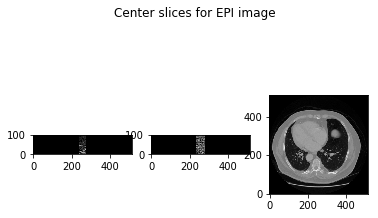

In [17]:
slice_0 = epi_img_data[511, :, :]
slice_1 = epi_img_data[:, 511, :]
slice_2 = epi_img_data[:, :, 101]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")

/home/ramesh/Desktop/WS/DecathalonDataset/Task08_HepaticVessel/imagesTs/hepaticvessel_276.nii.gz
(512, 512, 55)


/home/ramesh/Desktop/WS/code/basic_unet_example/src/batchgenerators/batchgenerators/dataloading/data_loader.py:50: DeprecationWarning: This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!
  warn("This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!", DeprecationWarning)


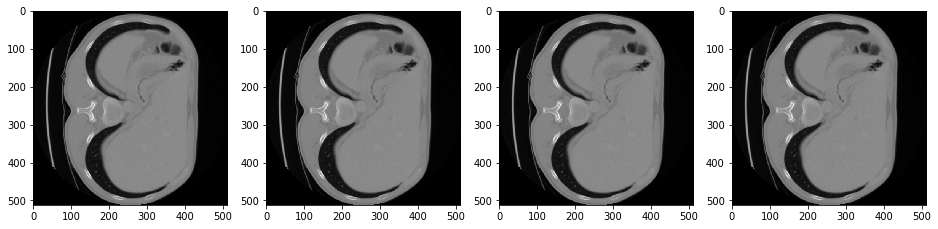

In [47]:
#loadImages("/home/ramesh/Desktop/WS/DecathalonDataset/Task07_Pancreas/imagesTs/")
dirPath1 = "/home/ramesh/Desktop/WS/DecathalonDataset/Task08_HepaticVessel/imagesTs/";
fileList = os.listdir(dirPath1) # dir is your directory path
fileCount = len(fileList)
#print(getImageDimention(test_dir_path,test_list[1]))
#for i in random.sample(range(1, fileCount), 3):
temp_Path = dirPath1+fileList[1]
print(temp_Path)
medicalImage = nib.load(temp_Path)
medicalImage_data = medicalImage.get_fdata()
print(medicalImage_data.shape)
slice34 = medicalImage_data[: ,:,45]
batchgen = DataLoader(slice34, 4, None, False)
batch = next(batchgen)
plot_batch(batch)

['Task07_Pancreas', 'Task08_HepaticVessel', 'Task06_Lung', 'Task09_Spleen', 'Task01_BrainTumour', 'Task03_Liver', 'Task05_Prostate', 'Task10_Colon', 'Task02_Heart', 'Task04_Hippocampus']


 Task : Task07_Pancreas
train_dir_path :/home/ramesh/Desktop/WS/DecathalonDataset/Task07_Pancreas/imagesTr
	 Training Data Count : 282
	 Test Data Count: 139
 	 File Name : /home/ramesh/Desktop/WS/DecathalonDataset/Task07_Pancreas/imagesTs/pancreas_031.nii.gz
(512, 512, 103)
/home/ramesh/Desktop/WS/DecathalonDataset/Task07_Pancreas/imagesTr/pancreas_242.nii.gz
z: 101
[42, 81, 22, 9]


/home/ramesh/Desktop/WS/code/basic_unet_example/src/batchgenerators/batchgenerators/dataloading/data_loader.py:50: DeprecationWarning: This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!
  warn("This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!", DeprecationWarning)


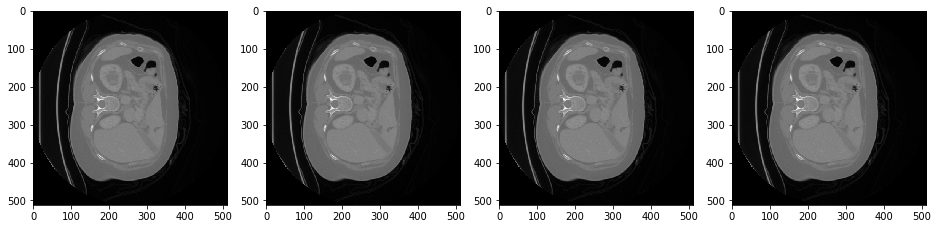

 Task : Task08_HepaticVessel
train_dir_path :/home/ramesh/Desktop/WS/DecathalonDataset/Task08_HepaticVessel/imagesTr
	 Training Data Count : 303
	 Test Data Count: 140
 	 File Name : /home/ramesh/Desktop/WS/DecathalonDataset/Task08_HepaticVessel/imagesTs/hepaticvessel_276.nii.gz
(512, 512, 55)
/home/ramesh/Desktop/WS/DecathalonDataset/Task08_HepaticVessel/imagesTr/hepaticvessel_119.nii.gz
z: 43
[23, 38, 42, 14]


/home/ramesh/Desktop/WS/code/basic_unet_example/src/batchgenerators/batchgenerators/dataloading/data_loader.py:50: DeprecationWarning: This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!
  warn("This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!", DeprecationWarning)


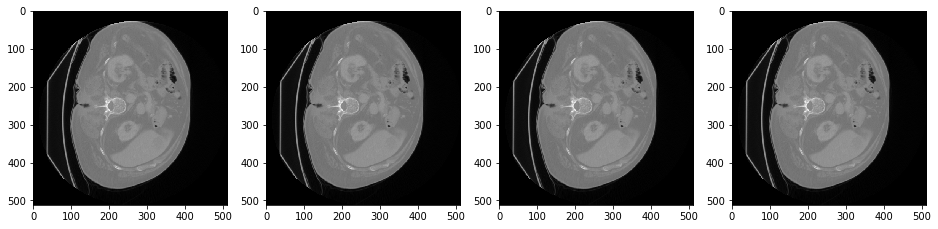

 Task : Task06_Lung
train_dir_path :/home/ramesh/Desktop/WS/DecathalonDataset/Task06_Lung/imagesTr
	 Training Data Count : 63
	 Test Data Count: 32
 	 File Name : /home/ramesh/Desktop/WS/DecathalonDataset/Task06_Lung/imagesTs/lung_011.nii.gz
(512, 512, 373)
/home/ramesh/Desktop/WS/DecathalonDataset/Task06_Lung/imagesTr/lung_015.nii.gz
z: 277
[215, 66, 167, 39]


/home/ramesh/Desktop/WS/code/basic_unet_example/src/batchgenerators/batchgenerators/dataloading/data_loader.py:50: DeprecationWarning: This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!
  warn("This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!", DeprecationWarning)


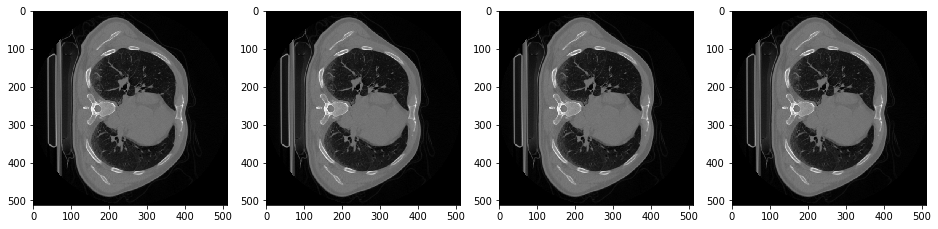

 Task : Task09_Spleen
train_dir_path :/home/ramesh/Desktop/WS/DecathalonDataset/Task09_Spleen/imagesTr
	 Training Data Count : 41
	 Test Data Count: 20
 	 File Name : /home/ramesh/Desktop/WS/DecathalonDataset/Task09_Spleen/imagesTs/spleen_50.nii.gz
(512, 512, 36)
/home/ramesh/Desktop/WS/DecathalonDataset/Task09_Spleen/imagesTr/spleen_13.nii.gz
z: 77
[12, 29, 60, 16]


/home/ramesh/Desktop/WS/code/basic_unet_example/src/batchgenerators/batchgenerators/dataloading/data_loader.py:50: DeprecationWarning: This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!
  warn("This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!", DeprecationWarning)


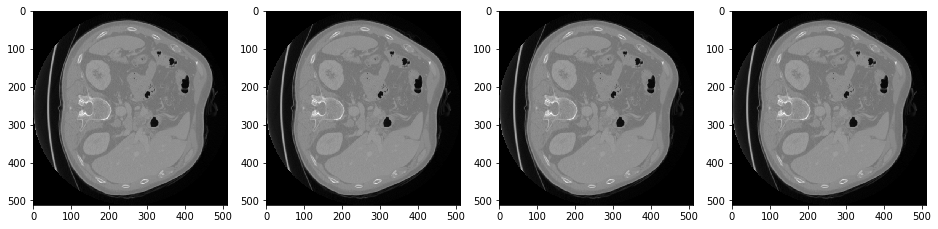

 Task : Task01_BrainTumour
train_dir_path :/home/ramesh/Desktop/WS/DecathalonDataset/Task01_BrainTumour/imagesTr
	 Training Data Count : 484
	 Test Data Count: 266
 	 File Name : /home/ramesh/Desktop/WS/DecathalonDataset/Task01_BrainTumour/imagesTs/BRATS_607.nii.gz
(240, 240, 155, 4)
/home/ramesh/Desktop/WS/DecathalonDataset/Task01_BrainTumour/imagesTr/BRATS_303.nii.gz
z: 155
[77, 82, 143, 51]


/home/ramesh/Desktop/WS/code/basic_unet_example/src/batchgenerators/batchgenerators/dataloading/data_loader.py:50: DeprecationWarning: This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!
  warn("This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!", DeprecationWarning)


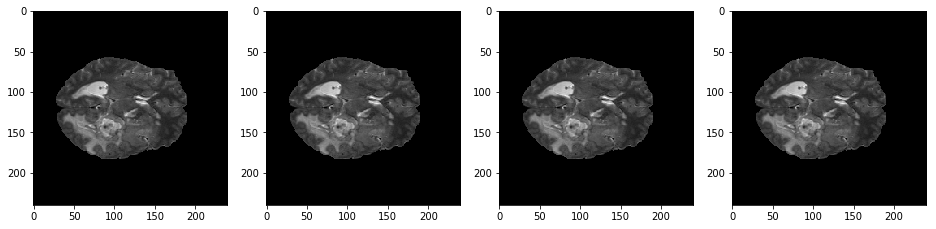

 Task : Task03_Liver
train_dir_path :/home/ramesh/Desktop/WS/DecathalonDataset/Task03_Liver/imagesTr
	 Training Data Count : 262
	 Test Data Count: 140
 	 File Name : /home/ramesh/Desktop/WS/DecathalonDataset/Task03_Liver/imagesTs/liver_178.nii.gz
(512, 512, 565)
/home/ramesh/Desktop/WS/DecathalonDataset/Task03_Liver/imagesTr/liver_24.nii.gz
z: 276
[69, 51, 25, 173]


/home/ramesh/Desktop/WS/code/basic_unet_example/src/batchgenerators/batchgenerators/dataloading/data_loader.py:50: DeprecationWarning: This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!
  warn("This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!", DeprecationWarning)


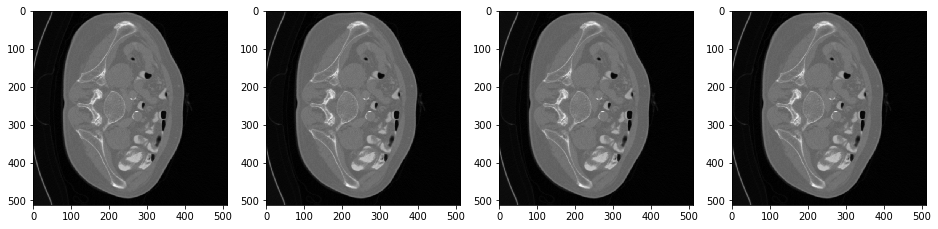

 Task : Task05_Prostate
train_dir_path :/home/ramesh/Desktop/WS/DecathalonDataset/Task05_Prostate/imagesTr
	 Training Data Count : 32
	 Test Data Count: 16
 	 File Name : /home/ramesh/Desktop/WS/DecathalonDataset/Task05_Prostate/imagesTs/prostate_27.nii.gz
(320, 320, 20, 2)
/home/ramesh/Desktop/WS/DecathalonDataset/Task05_Prostate/imagesTr/prostate_24.nii.gz
z: 20
[1, 11, 15, 11]


/home/ramesh/Desktop/WS/code/basic_unet_example/src/batchgenerators/batchgenerators/dataloading/data_loader.py:50: DeprecationWarning: This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!
  warn("This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!", DeprecationWarning)


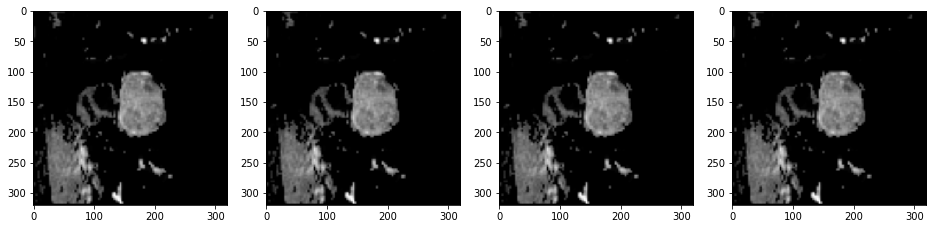

 Task : Task10_Colon
train_dir_path :/home/ramesh/Desktop/WS/DecathalonDataset/Task10_Colon/imagesTr
	 Training Data Count : 126
	 Test Data Count: 64
 	 File Name : /home/ramesh/Desktop/WS/DecathalonDataset/Task10_Colon/imagesTs/colon_084.nii.gz
(512, 512, 81)
/home/ramesh/Desktop/WS/DecathalonDataset/Task10_Colon/imagesTr/colon_038.nii.gz
z: 41
[9, 40, 38, 20]


/home/ramesh/Desktop/WS/code/basic_unet_example/src/batchgenerators/batchgenerators/dataloading/data_loader.py:50: DeprecationWarning: This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!
  warn("This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!", DeprecationWarning)


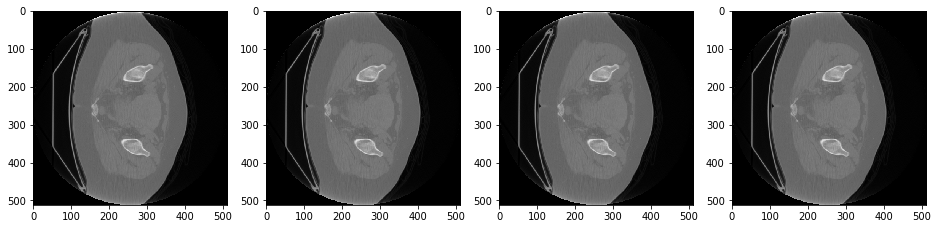

 Task : Task02_Heart
train_dir_path :/home/ramesh/Desktop/WS/DecathalonDataset/Task02_Heart/imagesTr
	 Training Data Count : 20
	 Test Data Count: 10
 	 File Name : /home/ramesh/Desktop/WS/DecathalonDataset/Task02_Heart/imagesTs/la_002.nii.gz
(320, 320, 140)
/home/ramesh/Desktop/WS/DecathalonDataset/Task02_Heart/imagesTr/la_016.nii.gz
z: 90
[48, 44, 36, 26]


/home/ramesh/Desktop/WS/code/basic_unet_example/src/batchgenerators/batchgenerators/dataloading/data_loader.py:50: DeprecationWarning: This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!
  warn("This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!", DeprecationWarning)


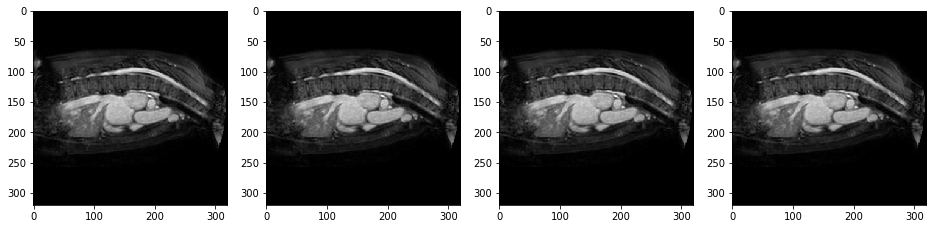

 Task : Task04_Hippocampus
train_dir_path :/home/ramesh/Desktop/WS/DecathalonDataset/Task04_Hippocampus/imagesTr
	 Training Data Count : 260
	 Test Data Count: 130
 	 File Name : /home/ramesh/Desktop/WS/DecathalonDataset/Task04_Hippocampus/imagesTs/hippocampus_002.nii.gz
(39, 47, 36)
/home/ramesh/Desktop/WS/DecathalonDataset/Task04_Hippocampus/imagesTr/hippocampus_295.nii.gz
z: 36
[21, 23, 6, 14]


/home/ramesh/Desktop/WS/code/basic_unet_example/src/batchgenerators/batchgenerators/dataloading/data_loader.py:50: DeprecationWarning: This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!
  warn("This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!", DeprecationWarning)


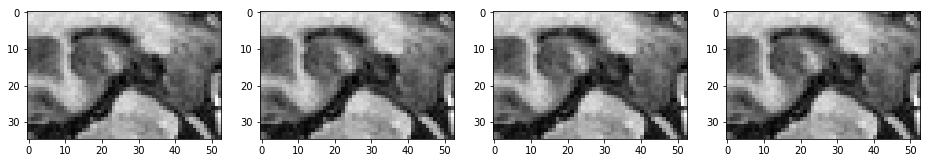

In [20]:
medical_image_data = "/home/ramesh/Desktop/WS/DecathalonDataset/";
training_data_dir = "/imagesTr";
test_data_dir = "/imagesTs";
label_data_dir = "/labelsTr" ;
dir_list = [d for d in os.listdir(medical_image_data) if not d.endswith(".tar")]
print(dir_list)
print("\n")

# Driver Code 
num = 4
start = 0
end = 5

for directory in dir_list:
    train_dir_path = medical_image_data + directory + training_data_dir;
    test_dir_path =  medical_image_data + directory + test_data_dir;
    label_dir_path = medical_image_data + directory + label_data_dir;
    print(" Task : "+directory)
    print("train_dir_path :" +train_dir_path)
    #print("test_dir_path :" +test_dir_path)
    #print("label_dir_path :" +label_dir_path+"\n")
    
    if os.path.exists(train_dir_path):
        train_list = os.listdir(train_dir_path) # dir is your directory path
        trainCount = len(train_list)
        print("\t Training Data Count : "+str(trainCount))
        end = trainCount;
        #print(getImageDimention(train_dir_path,train_list[1]))
    
    if os.path.exists(test_dir_path):
        test_list = os.listdir(test_dir_path) # dir is your directory path
        testCount = len(test_list)
        print("\t Test Data Count: "+str(testCount))
        print(getImageDimention(test_dir_path,test_list[1]))
        
    if os.path.exists(label_data_dir):
        label_list = os.listdir(label_data_dir) # dir is your directory path
        labelCount = len(test_list)
        print(" \t Label data count: "+str(labelCount))    
        print(getImageDimention(test_dir_path,test_list[1]))
    plotImages(train_dir_path+"/")    
#dir_list = [f for f in os.listdir(medical_image_data) if os.path.isdir(os.path.join('.', f))]
#print (dir_list)

/home/ramesh/Desktop/WS/DecathalonDataset/Task01_BrainTumour/imagesTs/BRATS_607.nii.gz
z: 155
[19, 122, 32, 4]


/home/ramesh/Desktop/WS/code/basic_unet_example/src/batchgenerators/batchgenerators/dataloading/data_loader.py:50: DeprecationWarning: This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!
  warn("This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!", DeprecationWarning)


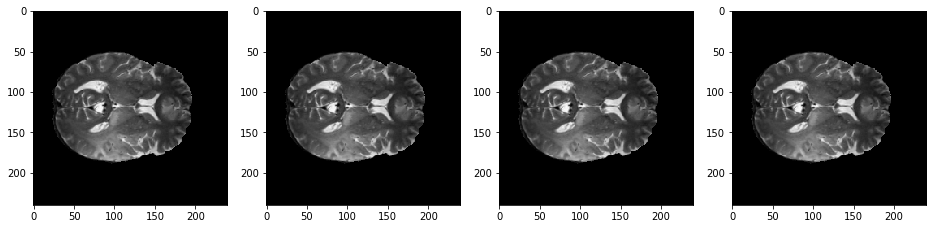

In [21]:
plotImages("/home/ramesh/Desktop/WS/DecathalonDataset/Task01_BrainTumour/imagesTs/")

In [24]:
def getImageSlice(directoryPath):
    fileList = os.listdir(directoryPath) # dir is your directory path
    fileCount = len(fileList)
    #print(getImageDimention(test_dir_path,test_list[1]))
    #for i in random.sample(range(1, fileCount), 3):
    temp_Path = directoryPath+fileList[1]
    print(temp_Path)
    medicalImage = nib.load(temp_Path)
    medicalImage_data = medicalImage.get_fdata()
    imgShape = medicalImage_data.shape
    x = imgShape[0]
    y = imgShape[1]
    z = imgShape[2]
    index = Rand(0,z-1,4)
    print("z: "+str(z))
    print(index)
    ind = int(z/2)
    #random.sample(range(1, z), 1)

    length = len(medicalImage_data.shape)
    if(length<4):
        #ind = random.sample(range(1, z), 1)
        imgSlice = medicalImage_data[: ,: ,ind]
    else :
        t = imgShape[3]
        imgSlice = medicalImage_data[: ,: ,ind,t-4]
        
    #batchgen = DataLoader(imgSlice, 4, None, False)
    #batch = next(batchgen)
    #plot_batch(batch)
    return imgSlice

In [25]:
plotImageLayers("/home/ramesh/Desktop/WS/DecathalonDataset/Task01_BrainTumour/imagesTs/")

NameError: name 'plotImageLayers' is not defined

/home/ramesh/Desktop/WS/DecathalonDataset/Task01_BrainTumour/imagesTs/BRATS_607.nii.gz
z: 155
[96, 24, 118, 1]


/home/ramesh/Desktop/WS/code/basic_unet_example/src/batchgenerators/batchgenerators/dataloading/data_loader.py:50: DeprecationWarning: This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!
  warn("This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!", DeprecationWarning)


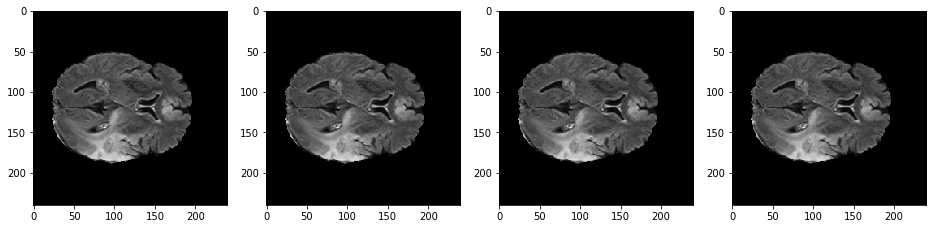

In [40]:
img1 = getImageSlice("/home/ramesh/Desktop/WS/DecathalonDataset/Task01_BrainTumour/imagesTs/")
batchgen1 = DataLoader(img1, 4, None, False)
batch1 = next(batchgen1)
plot_batch(batch1)

In [36]:
from batchgenerators.transforms.color_transforms import ContrastAugmentationTransform
from batchgenerators.transforms.spatial_transforms import MirrorTransform
from batchgenerators.transforms.abstract_transforms import Compose
from batchgenerators.dataloading.multi_threaded_augmenter import MultiThreadedAugmenter

my_transforms = []
brightness_transform = ContrastAugmentationTransform((0.3, 3.), preserve_range=True)
my_transforms.append(brightness_transform)

mirror_transform = MirrorTransform(axes=(0,1))
my_transforms.append(mirror_transform)

all_transforms = Compose(my_transforms)
multithreaded_generator = MultiThreadedAugmenter(batchgen1, all_transforms, 4, 2, seeds=None)

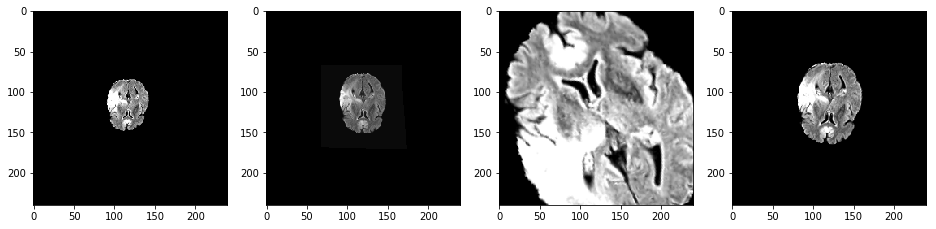

In [38]:
# you can run this line several times to see different outputs
plot_batch(next(multithreaded_generator))

In [37]:
from batchgenerators.transforms.spatial_transforms import SpatialTransform

img1 = getImageSlice("/home/ramesh/Desktop/WS/DecathalonDataset/Task01_BrainTumour/imagesTs/")
spatial_transform = SpatialTransform(img1.shape, np.array(img1.shape) // 2, 
                 do_elastic_deform=True, alpha=(0., 1500.), sigma=(30., 50.),
                 do_rotation=True, angle_z=(0, 2 * np.pi),
                 do_scale=True, scale=(0.3, 3.), 
                 border_mode_data='constant', border_cval_data=0, order_data=1,
                 random_crop=False)

my_transforms.append(spatial_transform)
all_transforms = Compose(my_transforms)
multithreaded_generator = MultiThreadedAugmenter(batchgen1, all_transforms, 4, 2, seeds=None)

/home/ramesh/Desktop/WS/DecathalonDataset/Task01_BrainTumour/imagesTs/BRATS_607.nii.gz
z: 155
[43, 96, 151, 40]


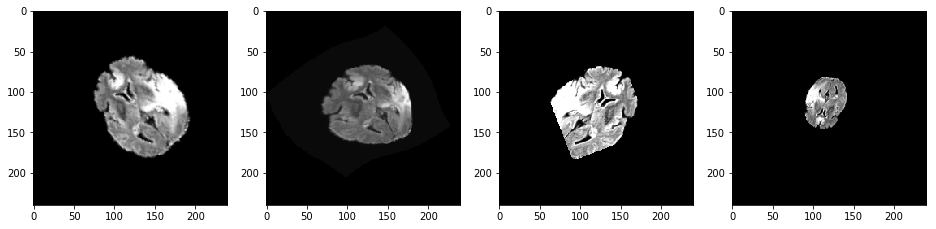

In [84]:
# you can run this line several times to see different outputs. Note how the computation takes long for the 
# first run, but then the batches are returnes very quickly!
plot_batch(next(multithreaded_generator))

In [30]:
from batchgenerators.transforms.abstract_transforms import RndTransform

sometimes_spatial_transform = RndTransform(spatial_transform, prob=0.5)
multithreaded_generator = MultiThreadedAugmenter(batchgen1, Compose([sometimes_spatial_transform]), 4, 2, seeds=None)

/home/ramesh/Desktop/WS/code/basic_unet_example/src/batchgenerators/batchgenerators/transforms/abstract_transforms.py:53: DeprecationWarning: This is deprecated. All applicable transfroms now have a p_per_sample argument which allows batchgenerators to do or not do an augmentation on a per-sample basis instead of the entire batch
  DeprecationWarning)


### Random Transforms

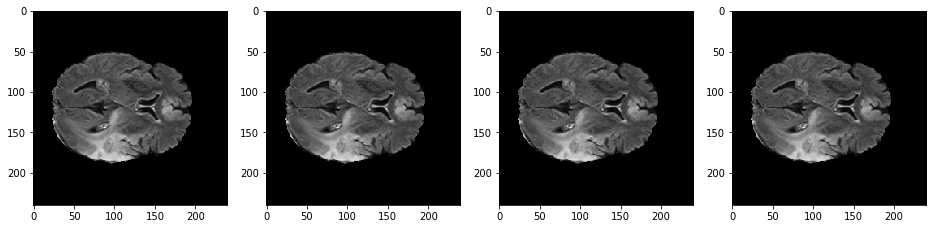

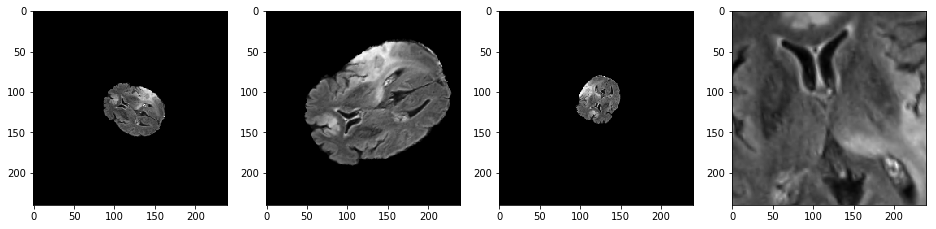

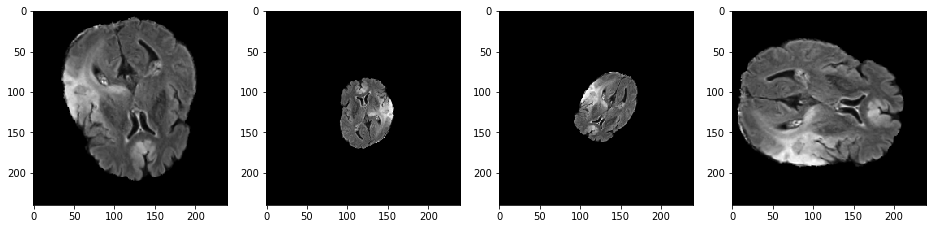

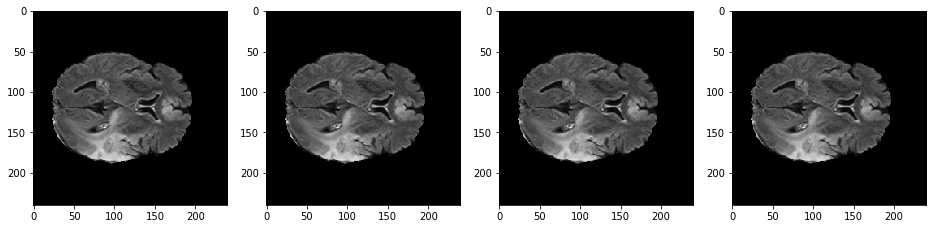

In [31]:
for _ in range(4):
    plot_batch(next(multithreaded_generator))

### Cropping

/home/ramesh/Desktop/WS/DecathalonDataset/Task01_BrainTumour/imagesTs/BRATS_607.nii.gz
z: 155
[1, 8, 41, 40]


/home/ramesh/Desktop/WS/code/basic_unet_example/src/batchgenerators/batchgenerators/dataloading/data_loader.py:50: DeprecationWarning: This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!
  warn("This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!", DeprecationWarning)


Crop followed by SpatialTransform (20 batches) took: 2.019 s


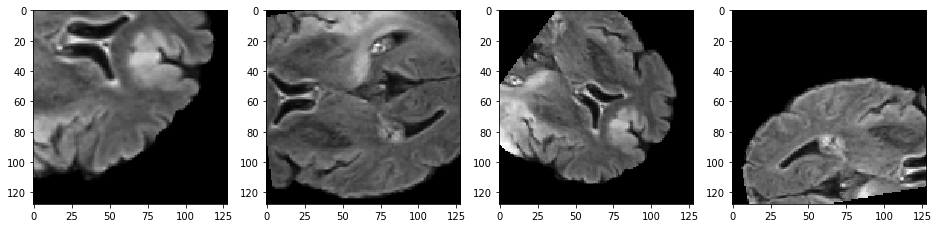




Crop integrated into SpatialTransform (20 batches) took: 2.299 s


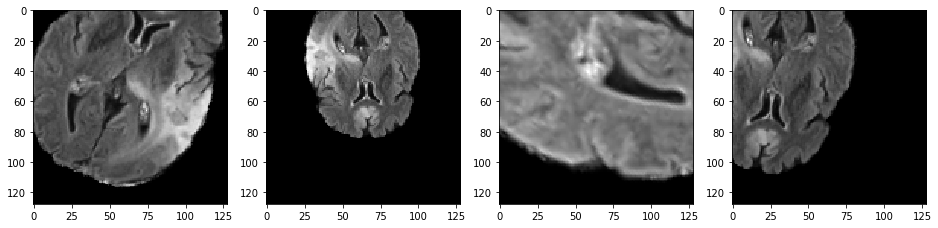

In [32]:
from time import time

# Spatial augmentation with small patches, crop first then transform (do not do this)
from batchgenerators.transforms.crop_and_pad_transforms import RandomCropTransform
crop_size = (128, 128)
img1 = getImageSlice("/home/ramesh/Desktop/WS/DecathalonDataset/Task01_BrainTumour/imagesTs/")

batchgen2 = DataLoader(img1, 4, None, False)

crop = RandomCropTransform(crop_size=crop_size)
spatial_transform = SpatialTransform(crop_size, np.array(crop_size) // 2, 
                 do_elastic_deform=True, alpha=(0., 1500.), sigma=(30., 50.),
                 do_rotation=True, angle_z=(0, 2 * np.pi),
                 do_scale=True, scale=(0.5, 2),
                 border_mode_data='constant', border_cval_data=0, order_data=1,
                 random_crop=False)
multithreaded_generator = MultiThreadedAugmenter(batchgen2, Compose([crop, spatial_transform]), 4, 2, seeds=None)

# time it
start = time()
for _ in range(100):
    _ = next(multithreaded_generator)
print("Crop followed by SpatialTransform (20 batches) took: %02.3f s" % (time()-start))

plot_batch(next(multithreaded_generator))

print("\n\n")

# spatial augmentation with snall patches, transform and crop together (do this!)
spatial_transform = SpatialTransform(crop_size, np.array(crop_size) // 2,
                 do_elastic_deform=True, alpha=(0., 1500.), sigma=(30., 50.),
                 do_rotation=True, angle_z=(0, 2 * np.pi),
                 do_scale=True, scale=(0.5, 2),
                 border_mode_data='constant', border_cval_data=0, order_data=1,
                 random_crop=True)
multithreaded_generator = MultiThreadedAugmenter(batchgen2, Compose([spatial_transform]), 4, 2, seeds=None)

# time it
start = time()
for _ in range(100):
    _ = next(multithreaded_generator)
print("Crop integrated into SpatialTransform (20 batches) took: %02.3f s" % (time()-start))

plot_batch(next(multithreaded_generator))

/home/ramesh/Desktop/WS/DecathalonDataset/Task01_BrainTumour/imagesTs/BRATS_607.nii.gz
z: 155
[128, 8, 67, 23]


/home/ramesh/Desktop/WS/code/basic_unet_example/src/batchgenerators/batchgenerators/dataloading/data_loader.py:50: DeprecationWarning: This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!
  warn("This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!", DeprecationWarning)


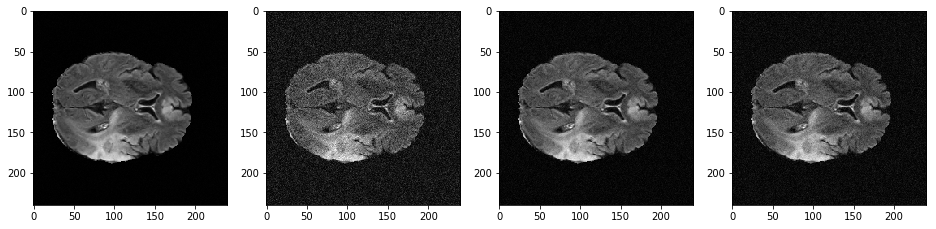

In [33]:
from batchgenerators.transforms.noise_transforms import RicianNoiseTransform
from batchgenerators.dataloading.multi_threaded_augmenter import MultiThreadedAugmenter


img3 = getImageSlice("/home/ramesh/Desktop/WS/DecathalonDataset/Task01_BrainTumour/imagesTs/")
batchgen3 = DataLoader(img1, 4, None, False)

noise_transform = RicianNoiseTransform(noise_variance=(0, 200))
multithreaded_generator = MultiThreadedAugmenter(batchgen3, noise_transform, 4, 2, seeds=None)

# you can run this line several times to see different outputs
plot_batch(next(multithreaded_generator))

In [ ]:
### Resampling

/home/ramesh/Desktop/WS/DecathalonDataset/Task01_BrainTumour/imagesTs/BRATS_607.nii.gz
z: 155
[136, 97, 102, 9]


/home/ramesh/Desktop/WS/code/basic_unet_example/src/batchgenerators/batchgenerators/dataloading/data_loader.py:50: DeprecationWarning: This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!
  warn("This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!", DeprecationWarning)


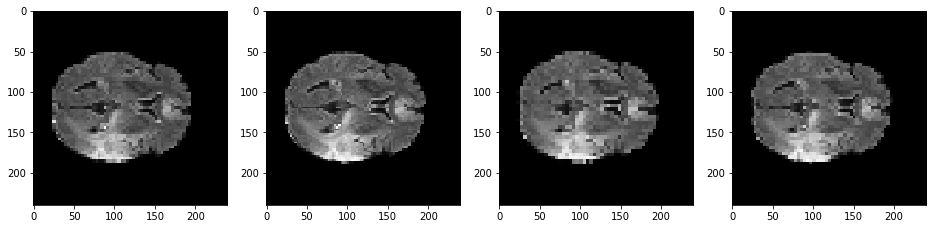

In [34]:
from batchgenerators.transforms.resample_transforms import SimulateLowResolutionTransform
from batchgenerators.dataloading.multi_threaded_augmenter import MultiThreadedAugmenter


img4 = getImageSlice("/home/ramesh/Desktop/WS/DecathalonDataset/Task01_BrainTumour/imagesTs/")
batchgen4 = DataLoader(img1, 4, None, False)

resample_transform = SimulateLowResolutionTransform(zoom_range=(0.5, 0.2))
multithreaded_generator = MultiThreadedAugmenter(batchgen4, resample_transform, 1, 2, seeds=None)

# you can run this line several times to see different outputs
plot_batch(next(multithreaded_generator))